In [132]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [133]:
raw = pd.read_excel('data-facial-wash.xlsx')
raw.head()

,Merk_Produk,Harga,Jenis_Kulit,Rating,Jumlah_Terjual
0,Cetaphil Gentle Skin Cleanser,23250,1,3.504,1334
1,MS Glow Facial Wash,26500,2,4.231,978
2,COSRX Low pH Good Morning Gel Cleanser,16999,3,4.883,1243
3,COSRX Salicylic Acid Daily Gentle Cleanser,32500,4,4.654,256
4,Scarlett Whitening Facial Wash,21300,5,4.764,660


In [134]:
data = raw.drop(['Merk_Produk'], axis=1)
data = data.to_numpy()
data

array([[2.3250e+04, 1.0000e+00, 3.5040e+00, 1.3340e+03],
       [2.6500e+04, 2.0000e+00, 4.2310e+00, 9.7800e+02],
       [1.6999e+04, 3.0000e+00, 4.8830e+00, 1.2430e+03],
       [3.2500e+04, 4.0000e+00, 4.6540e+00, 2.5600e+02],
       [2.1300e+04, 5.0000e+00, 4.7640e+00, 6.6000e+02],
       [1.8200e+04, 5.0000e+00, 4.3670e+00, 7.5000e+02],
       [3.3000e+04, 2.0000e+00, 5.0000e+00, 7.7000e+02],
       [1.4040e+04, 1.0000e+00, 4.9060e+00, 6.9600e+02],
       [1.4000e+04, 1.0000e+00, 4.0040e+00, 3.4500e+02],
       [1.3275e+04, 4.0000e+00, 3.0470e+00, 6.0800e+02],
       [3.2000e+04, 1.0000e+00, 5.0000e+00, 5.5000e+02],
       [3.1702e+04, 4.0000e+00, 4.3240e+00, 6.7700e+02],
       [1.5499e+04, 4.0000e+00, 4.5640e+00, 8.5400e+02],
       [2.0200e+04, 1.0000e+00, 3.7650e+00, 5.5000e+02],
       [1.5867e+04, 5.0000e+00, 5.0000e+00, 8.8800e+02],
       [2.2000e+04, 5.0000e+00, 3.0050e+00, 7.6500e+02],
       [3.2500e+04, 1.0000e+00, 3.7640e+00, 8.5000e+02],
       [5.5800e+04, 3.0000e+00,

In [135]:
# Define hyperparameters
n_clusters_range = range(2, 15)
n_clusters = 5
max_iter = 1000
m = 2
error = 0.005

In [136]:
# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42)

# Predict cluster membership for each data2 point
cluster_membership = np.argmax(u, axis=0)

# Print the cluster centers
print('Cluster Centers:', cntr)
 
# Print the cluster membership for each data2 point
print('Cluster Membership:', cluster_membership)


Cluster Centers: [[1.66169164e+04 2.81471142e+00 4.17077085e+00 8.07943606e+02]
 [9.31252472e+04 3.18424697e+00 4.87269051e+00 9.44129366e+02]
 [3.19999287e+05 3.99999603e+00 3.99300169e+00 6.96000653e+02]
 [6.05257281e+04 3.99059222e+00 3.54784253e+00 6.75563292e+02]
 [3.19153964e+04 1.88433439e+00 4.39776361e+00 7.28528963e+02]]
Cluster Membership: [0 4 0 4 0 0 4 0 0 0 4 4 0 0 0 0 4 3 2 0 4 4 0 4 4 1 4 0 4 3 4 1 4 4 0]


In [137]:
# Apply fuzzy c-means clustering
fpcs = []
for n_clusters in n_clusters_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, m, error=error, maxiter=max_iter, init=None, seed=42)
    fpcs.append(fpc)

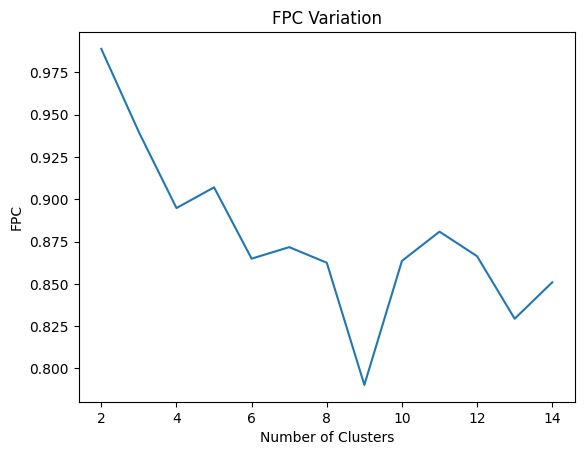

In [138]:
# Line plot of FPC vs. number of clusters
plt.plot(n_clusters_range, fpcs)
plt.xlabel('Number of Clusters')
plt.ylabel('FPC')
plt.title('FPC Variation')
plt.show()